In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('home_loan.csv')

In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
data = data.drop('Loan_ID', axis = 1)

In [11]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [14]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

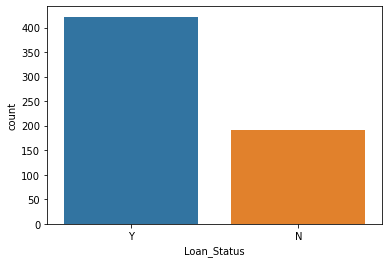

In [15]:
sns.countplot(data=data, x = 'Loan_Status')
plt.show()

In [20]:
data['TotalIncome'] = data['ApplicantIncome']  + data['CoapplicantIncome']

In [21]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='TotalIncome'>

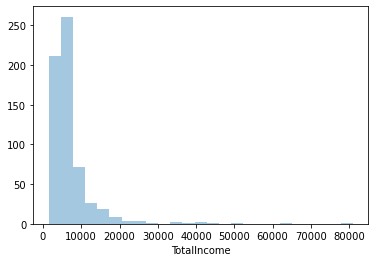

In [24]:
sns.distplot(data['TotalIncome'], bins = 25, kde = False)

In [26]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High


In [29]:
TotalIncome = pd.crosstab(data['TotalIncome_bin'], data['Loan_Status'])
TotalIncome

Loan_Status,N,Y
TotalIncome_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


<AxesSubplot:xlabel='TotalIncome_bin'>

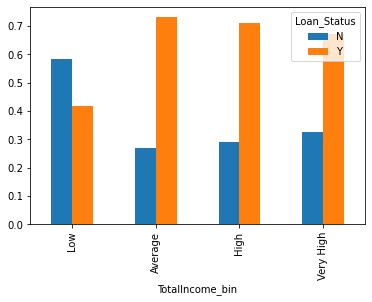

In [33]:
TotalIncome.div(TotalIncome.sum(axis=1), axis = 0).plot.bar()

## Loan Amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

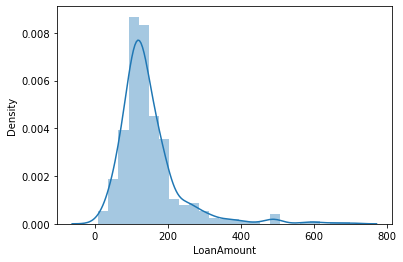

In [35]:
sns.distplot(data['LoanAmount'], bins = 25)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

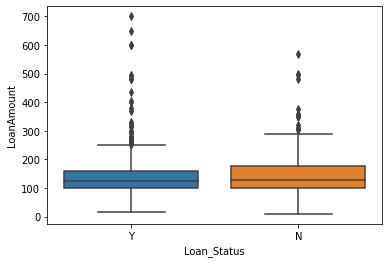

In [36]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount' , data = data)

# Loan Term

In [41]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [43]:
data['Loan_Amount_Term'] =data['Loan_Amount_Term']/12

In [44]:
data['Loan_Amount_Term']

0      30.0
1      30.0
2      30.0
3      30.0
4      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

<AxesSubplot:>

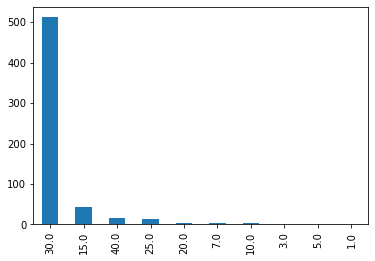

In [45]:
data['Loan_Amount_Term'].value_counts().plot.bar()

# Missing Data.

In [ ]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(30.0)

In [50]:
data['Loan_Amount_per_year'] = data['LoanAmount'] / data['Loan_Amount_Term']

In [51]:
data['Loan_Amount_per_year']

0           NaN
1      4.266667
2      2.200000
3      4.000000
4      4.700000
         ...   
609    2.366667
610    2.666667
611    8.433333
612    6.233333
613    4.433333
Name: Loan_Amount_per_year, Length: 614, dtype: float64

<AxesSubplot:xlabel='Loan_Amount_per_year', ylabel='Density'>

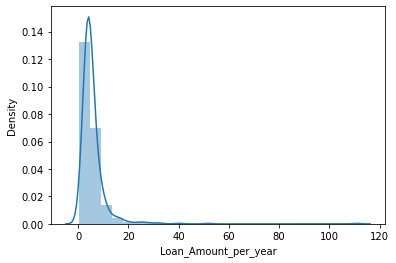

In [52]:
sns.distplot(data['Loan_Amount_per_year'], bins = 25)

In [53]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


# EMI

## create a new column/feature for EMI

## Dependents

In [55]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Categorical Variables

In [60]:
data['Dependents'] =data['Dependents'].replace(to_replace= '3+', value=3 ).astype('float')

In [62]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


In [67]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [75]:
data['Gender'] =data['Gender'].fillna('Other')

In [87]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

# Missing Data

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
imputer = SimpleImputer(strategy='most_frequent')

In [94]:
data['Married'] = imputer.fit_transform(pd.DataFrame(data['Married']))

# OrdinalEncoding / Label Encoding - Ordinal Data

In [76]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [77]:
encoder = LabelEncoder()

In [79]:
data['Gender'] = encoder.fit_transform(data['Gender'])

In [83]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,1,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,1,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


In [95]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# OneHot Encoding - Nomial Data

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
ohe = OneHotEncoder()

In [102]:
ohe.fit_transform(pd.DataFrame(data['Property_Area'])).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [104]:
pd.get_dummies(data['Property_Area'], drop_first=True)

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


# Feature Transformation

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

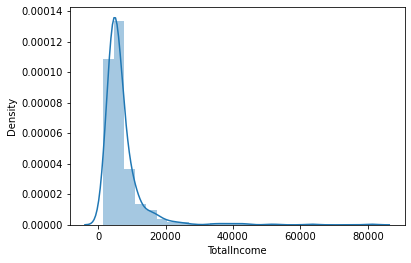

In [106]:
sns.distplot(data['TotalIncome'], bins = 25)

In [107]:
data['TotalIncome'].apply(np.log)

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: TotalIncome, Length: 614, dtype: float64

Text(0.5, 0, 'TOTAL INCOME (in log)')

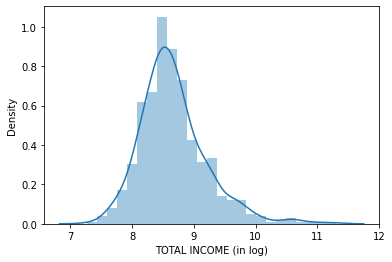

In [109]:
sns.distplot(data['TotalIncome'].apply(np.log), bins = 25)
plt.xlabel("TOTAL INCOME (in log)")

<AxesSubplot:xlabel='Loan_Amount_per_year'>

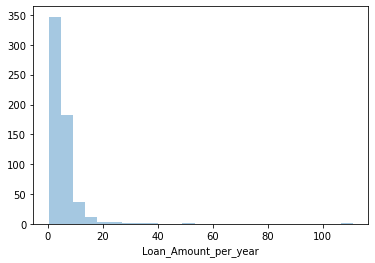

In [111]:
sns.distplot(data['Loan_Amount_per_year'], bins = 25, kde = False)

Text(0.5, 0, 'Loan Amount Per year INCOME (in log)')

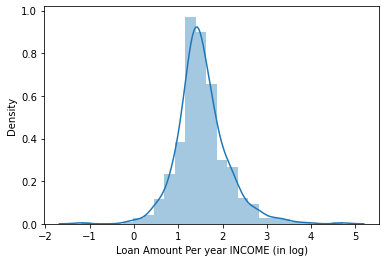

In [114]:
sns.distplot(data['Loan_Amount_per_year'].apply(np.log), bins = 25, )
plt.xlabel("Loan Amount Per year INCOME (in log)")